In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [4]:
df_bike = pd.read_csv("Divvy_Trips.csv")
df_weather = pd.read_csv("Chicago_weather.csv")

In [5]:
df_bike.shape

(3601560, 18)

In [6]:
df_weather.shape

(365, 11)

In [7]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601560 entries, 0 to 3601559
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRIP ID            int64  
 1   START TIME         object 
 2   STOP TIME          object 
 3   BIKE ID            int64  
 4   TRIP DURATION      int64  
 5   FROM STATION ID    int64  
 6   FROM STATION NAME  object 
 7   TO STATION ID      int64  
 8   TO STATION NAME    object 
 9   USER TYPE          object 
 10  GENDER             object 
 11  BIRTH YEAR         float64
 12  FROM LATITUDE      float64
 13  FROM LONGITUDE     float64
 14  FROM LOCATION      object 
 15  TO LATITUDE        float64
 16  TO LONGITUDE       float64
 17  TO LOCATION        object 
dtypes: float64(5), int64(5), object(8)
memory usage: 494.6+ MB


In [8]:
df_bike.head(5)

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,17536702,01/01/2018 12:12:00 AM,01/01/2018 12:17:00 AM,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,41.909396,-87.677692,POINT (-87.6776919292 41.9093960065),41.907781,-87.685854,POINT (-87.685854 41.907781)
1,17536703,01/01/2018 12:41:00 AM,01/01/2018 12:47:00 AM,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave,Subscriber,Male,1984.0,41.968812,-87.657659,POINT (-87.657659 41.968812),41.973345,-87.667682,POINT (-87.667682 41.973345)
2,17536704,01/01/2018 12:44:00 AM,01/01/2018 01:33:00 AM,4599,2904,98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,41.882664,-87.632530,POINT (-87.63253 41.882664),41.909769,-87.705280,POINT (-87.7052804871 41.90976930169)
3,17536706,01/01/2018 12:53:00 AM,01/01/2018 12:56:00 AM,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,41.857556,-87.661535,POINT (-87.661535 41.857556),41.857901,-87.668745,POINT (-87.668745 41.857901)
4,17536705,01/01/2018 12:53:00 AM,01/01/2018 01:05:00 AM,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,41.890173,-87.626185,POINT (-87.626185 41.890173),41.900219,-87.642985,POINT (-87.6429854676 41.90021949323)


In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   tavg    365 non-null    float64
 2   tmin    365 non-null    float64
 3   tmax    365 non-null    float64
 4   prcp    365 non-null    float64
 5   snow    365 non-null    int64  
 6   wdir    185 non-null    float64
 7   wspd    365 non-null    float64
 8   wpgt    0 non-null      float64
 9   pres    289 non-null    float64
 10  tsun    0 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 31.5+ KB


In [10]:
df_weather.head(5)

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2018-01-01,-18.9,-22.7,-17.1,0.0,30,282.0,17.3,NaN,1040.4,NaN
1,2018-01-02,-19.1,-22.7,-13.2,0.0,30,241.0,18.0,NaN,1033.1,NaN
2,2018-01-03,-11.4,-14.3,-8.2,0.0,30,283.0,19.8,NaN,1019.9,NaN
3,2018-01-04,-13.9,-17.7,-11.0,0.0,30,328.0,19.8,NaN,1026.6,NaN
4,2018-01-05,-15.2,-18.2,-11.6,0.0,30,319.0,17.3,NaN,1031.0,NaN


In [11]:
df_bike['date'] = pd.to_datetime(df_bike['START TIME']).dt.date

In [12]:
df_bike.head(5)

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,date
0,17536702,01/01/2018 12:12:00 AM,01/01/2018 12:17:00 AM,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,41.909396,-87.677692,POINT (-87.6776919292 41.9093960065),41.907781,-87.685854,POINT (-87.685854 41.907781),2018-01-01
1,17536703,01/01/2018 12:41:00 AM,01/01/2018 12:47:00 AM,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave,Subscriber,Male,1984.0,41.968812,-87.657659,POINT (-87.657659 41.968812),41.973345,-87.667682,POINT (-87.667682 41.973345),2018-01-01
2,17536704,01/01/2018 12:44:00 AM,01/01/2018 01:33:00 AM,4599,2904,98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,41.882664,-87.632530,POINT (-87.63253 41.882664),41.909769,-87.705280,POINT (-87.7052804871 41.90976930169),2018-01-01
3,17536706,01/01/2018 12:53:00 AM,01/01/2018 12:56:00 AM,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,41.857556,-87.661535,POINT (-87.661535 41.857556),41.857901,-87.668745,POINT (-87.668745 41.857901),2018-01-01
4,17536705,01/01/2018 12:53:00 AM,01/01/2018 01:05:00 AM,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,41.890173,-87.626185,POINT (-87.626185 41.890173),41.900219,-87.642985,POINT (-87.6429854676 41.90021949323),2018-01-01


In [13]:
df_weather.head(5)

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2018-01-01,-18.9,-22.7,-17.1,0.0,30,282.0,17.3,NaN,1040.4,NaN
1,2018-01-02,-19.1,-22.7,-13.2,0.0,30,241.0,18.0,NaN,1033.1,NaN
2,2018-01-03,-11.4,-14.3,-8.2,0.0,30,283.0,19.8,NaN,1019.9,NaN
3,2018-01-04,-13.9,-17.7,-11.0,0.0,30,328.0,19.8,NaN,1026.6,NaN
4,2018-01-05,-15.2,-18.2,-11.6,0.0,30,319.0,17.3,NaN,1031.0,NaN


In [14]:
df_merge = df_bike.join(df_weather, on='date', how='inner',lsuffix='l_', rsuffix='r_')

In [15]:
df_merge.shape

(0, 31)

In [16]:
df_merge.head(5)

,date,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun


In [17]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               0 non-null      int64  
 1   TRIP ID            0 non-null      int64  
 2   START TIME         0 non-null      object 
 3   STOP TIME          0 non-null      object 
 4   BIKE ID            0 non-null      int64  
 5   TRIP DURATION      0 non-null      int64  
 6   FROM STATION ID    0 non-null      int64  
 7   FROM STATION NAME  0 non-null      object 
 8   TO STATION ID      0 non-null      int64  
 9   TO STATION NAME    0 non-null      object 
 10  USER TYPE          0 non-null      object 
 11  GENDER             0 non-null      object 
 12  BIRTH YEAR         0 non-null      float64
 13  FROM LATITUDE      0 non-null      float64
 14  FROM LONGITUDE     0 non-null      float64
 15  FROM LOCATION      0 non-null      object 
 16  TO LATITUDE        0 non-null      float64


In [18]:
BikeRentalData = df_merge[['datel_','START TIME','TRIP DURATION','GENDER','USER TYPE','tavg','prcp','snow','wspd']]

In [19]:
BikeRentalData.columns = ['date','start_time','trip_duration','gender','user_type','temp_average','rain','snow','windspeed']

In [20]:
BikeRentalData.shape

(0, 9)

In [21]:
def weather_cond(value):
    if value < 5:
        return "cold"
    elif value > 20:
        return "hot"
    else:
        return "moderate"
BikeRentalData['weather_cond'] = BikeRentalData.apply(lambda row: weather_cond(row['temp_average']), axis = 1)

ValueError: Wrong number of items passed 9, placement implies 1

In [ ]:
def user_type(value):
    if value == "Subscriber":
        return 1
    else:
        return 0
BikeRentalData['user_type'] = BikeRentalData.apply(lambda row: user_type(row['user_type']), axis = 1)

In [ ]:
def gender(value):
    if value == "Male":
        return 1
    else:
        return 0
BikeRentalData['Male_flag'] = BikeRentalData.apply(lambda row: gender(row['gender']), axis = 1)
def gender1(value):
    if value == "Female":
        return 1
    else:
        return 0
BikeRentalData['Female_flag'] = BikeRentalData.apply(lambda row: gender1(row['gender']), axis = 1)

In [ ]:
def rain(value):
    if value > 0:
        return "Y"
    else:
        return "N"
BikeRentalData['rain_flag'] = BikeRentalData.apply(lambda row: rain(row['rain']), axis = 1)

In [ ]:
def snow(value):
    if value > 0:
        return "Y"
    else:
        return "N"
BikeRentalData['snow_flag'] = BikeRentalData.apply(lambda row: snow(row['snow']), axis = 1)

In [ ]:
BikeRentalData['weekday'] = (pd.DatetimeIndex(BikeRentalData.date).dayofweek).astype(float)

In [22]:
holidays = ['2018-01-01','2018-01-15','2018-02-12','2018-02-19','2018-03-05','2018-05-28','2018-07-04','2018-09-03','2018-10-08','2018-11-06','2018-11-22','2018-12-05','2018-12-31']
#BikeRentalData['holidays'] = np.where(BikeRentalData['date'].dt.date.isin(holidays), 1, 0)
BikeRentalData = pd.read_csv("hour.csv")

In [23]:
BikeRentalData.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2018-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2018-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2018-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2018-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<AxesSubplot:title={'center':'Heatmap of Pairwise Correlations'}>

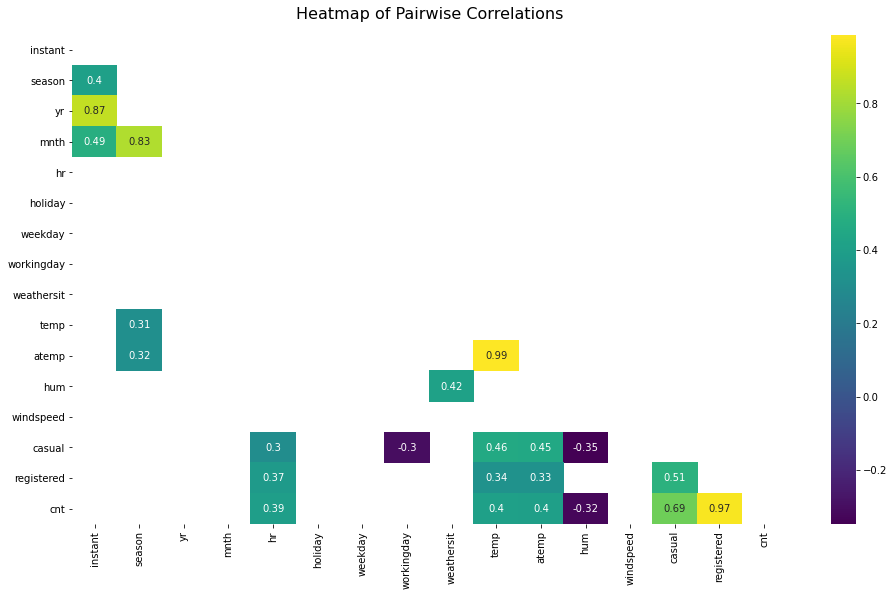

In [24]:
corrmat = BikeRentalData.corr()

# setup up axes
fig, ax3 = plt.subplots(figsize = (16, 9))
ax3.set_title("Heatmap of Pairwise Correlations", size = 16, y = 1.02)

# Mask upper triangle of off-diagonals
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(corrmat)] = True
mask[np.abs(corrmat) <= 0.3] = True

# generate heatmap
sns.heatmap(corrmat, annot = True, ax = ax3,
            cmap = "viridis", mask = mask)

### Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the count of rented bikes? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.


There are four commands which are used for Basic data exploration in Python
head() : This helps to see a few sample rows of the data
info() : This provides the summarized information of the data
describe() : This provides the descriptive statistical details of the data
nunique(): This helps us to identify if a column is categorical or continuous

In [25]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
BikeRentalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [26]:
# Looking at the descriptive statistics of the data
BikeRentalData.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2018-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [27]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BikeRentalData.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Visual Exploratory Data Analysis
Categorical variables: Bar plot
Continuous variables: Histogram
Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
Based on the Basic Data Exploration above, we have spotted seven categorical predictors in the data
Categorical Predictors: 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'
We use bar charts to see how the data is distributed for these categorical columns.

In [28]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

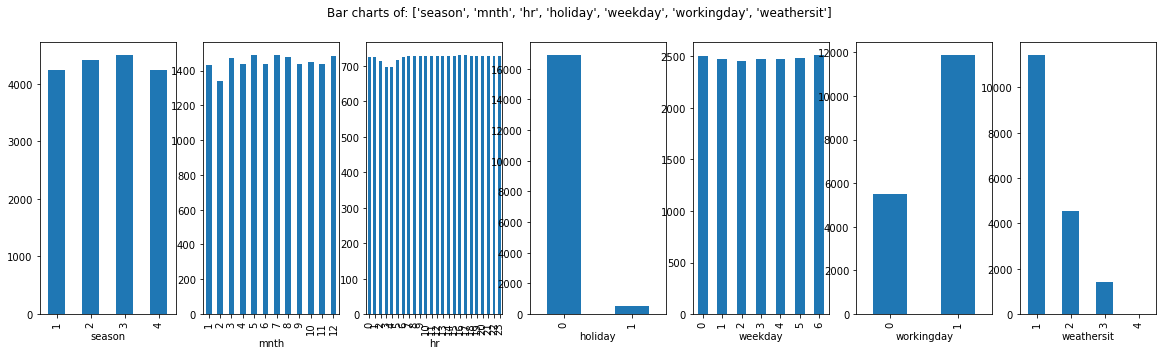

In [29]:
# Calling the function
#Categorical Predictors: 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'
PlotBarCharts(inpData=BikeRentalData, colsToPlot=[
    'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, There are five continuous predictor variables 'ave_temp','windspeed', and'registered'.

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'registered'}>, <AxesSubplot:>]],
      dtype=object)

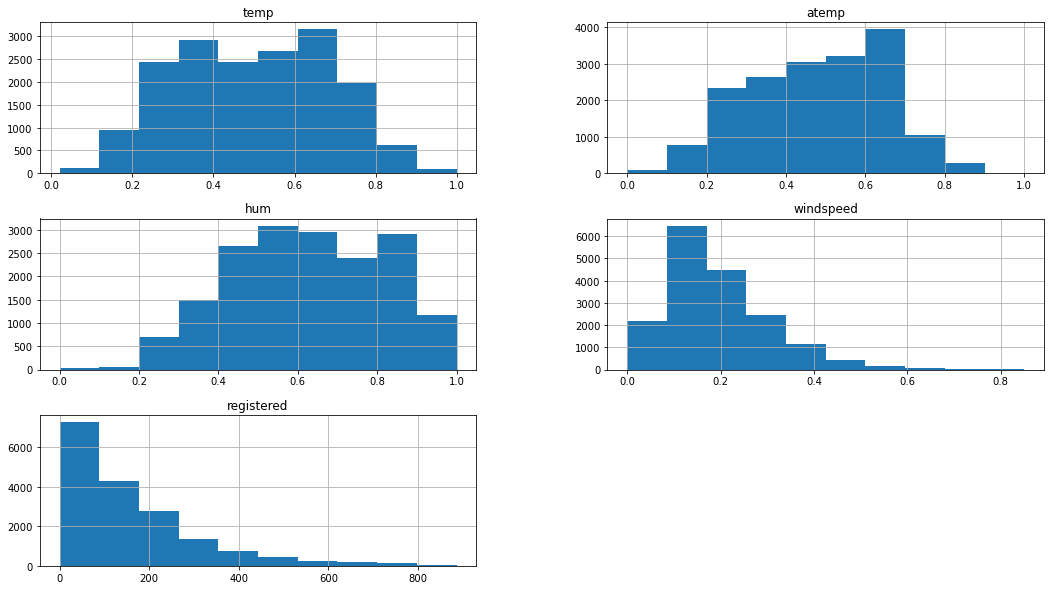

In [30]:
# Plotting histograms of multiple columns together
BikeRentalData.hist(['temp','atemp','hum','windspeed','registered'], figsize=(18,10))

Missing values treatment
Missing values are treated for each column separately.
If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.
There are below options for treating missing values in data.
Delete the missing value rows if there are only few records
Impute the missing values with MEDIAN value for continuous variables
Impute the missing values with MODE value for categorical variables
Interpolate the values based on nearby values
Interpolate the values based on business logic

In [31]:
# Finding how many missing values are there for each column
BikeRentalData.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

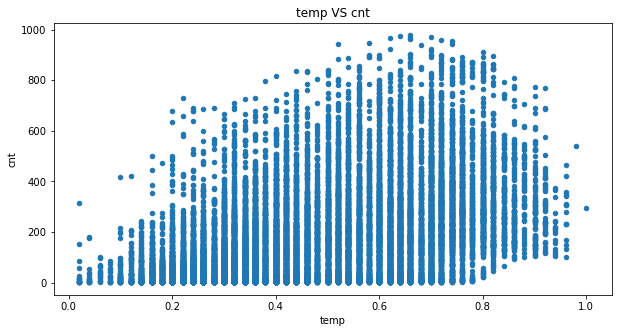

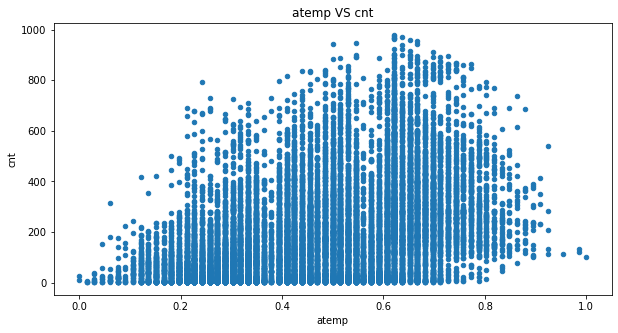

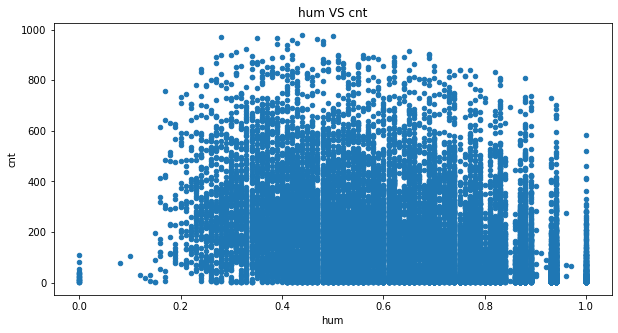

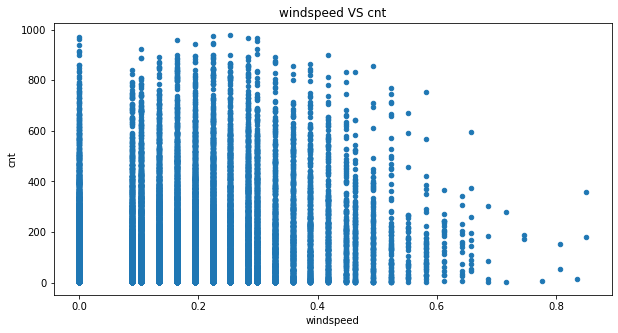

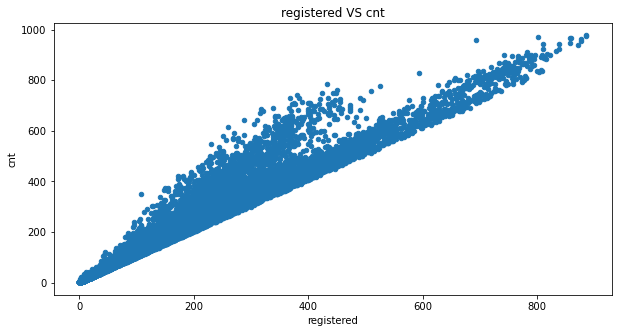

In [32]:
ContinuousCols=['temp','atemp','hum','windspeed','registered']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BikeRentalData.plot.scatter(x=predictor, y='cnt', figsize=(10,5), title=predictor+" VS "+ 'cnt')

#### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

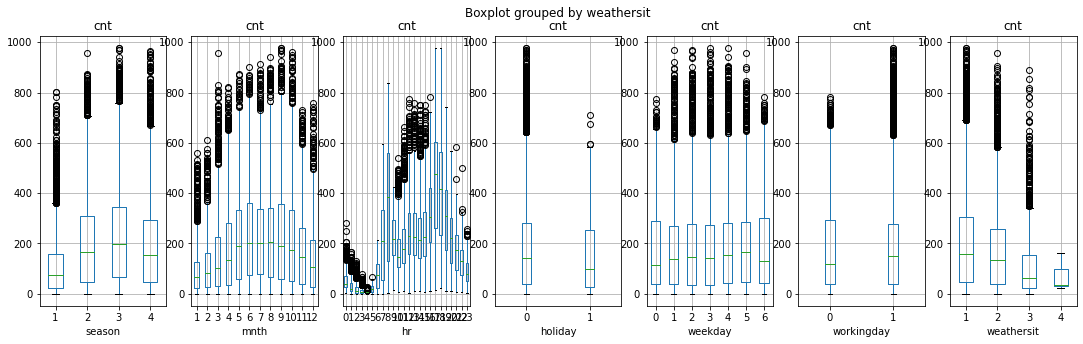

In [33]:
# Box plots for Categorical Target Variable "cnt" and continuous predictors
CategoricalColsList=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "cnt"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BikeRentalData.boxplot(column='cnt', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

### Selecting final predictor of Machine learning

In [34]:
SelectedColumns=['registered','season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Selecting final columns
DataForML=BikeRentalData[SelectedColumns]
DataForML.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit
0,13,1,1,0,0,6,0,1
1,32,1,1,1,0,6,0,1
2,27,1,1,2,0,6,0,1
3,10,1,1,3,0,6,0,1
4,1,1,1,4,0,6,0,1


In [35]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

### Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
Converting each Ordinal Categorical columns to numeric
Converting Binary nominal Categorical columns to numeric using 1/0 mapping
Converting all other nominal categorical columns to numeric using pd.get_dummies()
Data Transformation (Optional): Standardization/Normalization/log/sqrt.

In this data there is no Ordinal categorical variable which is in string format.
Converting the binary nominal variable to numeric using 1/0 mapping
All the binary nominal variables are already in numeric format
Converting the nominal variable to numeric using get_dummies()

In [36]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['cnt']=BikeRentalData['cnt']

# Printing sample rows
DataForML_Numeric.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,13,1,1,0,0,6,0,1,16
1,32,1,1,1,0,6,0,1,40
2,27,1,1,2,0,6,0,1,32
3,10,1,1,3,0,6,0,1,13
4,1,1,1,4,0,6,0,1,1


### Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [40]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['registered', 'season', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'cnt'],
      dtype='object')

In [41]:
# Separate Target Variable and Predictor Variables
TargetVariable='cnt'
Predictors=['registered', 'season', 'mnth', 'hr', 'holiday',
       'weekday', 'workingday', 'weathersit']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

### Standardization/Normalization of data

In [42]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Multiple Linear Regression

In [43]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9577503192129495

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  425         331.0
1   88         131.0
2    4           0.0
3  526         537.0
4   13           1.0
Mean Accuracy on test data: 29.017672551319052
Median Accuracy on test data: 85.90451905369032

Accuracy values for 10-fold Cross Validation:
 [-74.05281905  26.66855878  59.00787187  49.87097037  14.74427964
  13.93940985  48.56612629  69.48436065  69.73170097  39.90340538]

Final Average Accuracy of the model: 31.79


### Decision tress 

DecisionTreeRegressor(max_depth=8)
R2 Value: 0.9861468752636887

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  425         369.0
1   88          88.0
2    4           4.0
3  526         506.0
4   13          12.0
Mean Accuracy on test data: 89.19882645802254
Median Accuracy on test data: 92.37288135593221

Accuracy values for 10-fold Cross Validation:
 [85.31020556 87.35255788 89.17786309 89.76665783 85.37710361 82.95356003
 89.23210927 90.86058574 90.1421233  86.44785941]

Final Average Accuracy of the model: 87.66


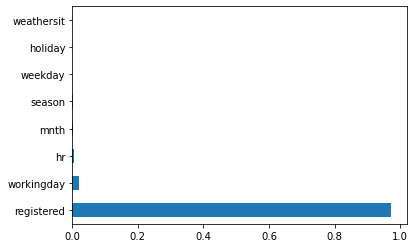

In [44]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=8,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Random forest 

RandomForestRegressor(max_depth=10)
R2 Value: 0.9930788431773514

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  425         367.0
1   88          98.0
2    4           5.0
3  526         519.0
4   13          10.0
Mean Accuracy on test data: 90.7185033716899
Median Accuracy on test data: 94.28852643419573

Accuracy values for 10-fold Cross Validation:
 [87.51438284 88.20490883 90.9361603  91.14667729 87.96522736 84.60801997
 89.64894032 92.59648956 92.02177029 88.6805927 ]

Final Average Accuracy of the model: 89.33


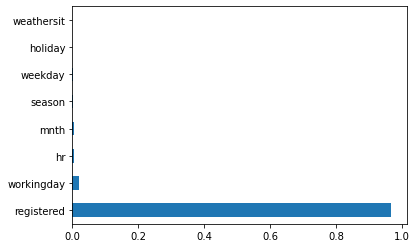

In [49]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=10, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### XGboost

In [50]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/aviro092/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/aviro092/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
